<img src="images/cads-logo.png" style="height: 100px;" align=left> <img src="images/apache_spark.png" style="height: 20%;width:20%" align=right>

# Decision Tree Mini Project

A pet food company wants to know why some batches of their pet foods are spoiling much quicker than expected. The pet food company first mixes up a batch of preservative that contains four different preservative chemicals (A,B,C,D) and then is completed with a "filler" chemical. The food scientists believe one of the A,B,C, or D preservatives is causing the problem, but need your help to figure out which one.
Use the Decision Tree algorithm to find out which parameter had the most predictive power, thus finding out which chemical causes the early spoiling. So, create a DT model and then find out how you can decide which chemical is the problem.

- Pres_A : Percentage of preservative A in the mix
- Pres_B : Percentage of preservative B in the mix
- Pres_C : Percentage of preservative C in the mix
- Pres_D : Percentage of preservative D in the mix
- Spoiled: Label indicating whether or not the pet food batch was spoiled.


In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
chem = pd.read_csv("pet_food.csv")
chem

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0
...,...,...,...,...,...
485,8,3,6.0,6,0.0
486,6,4,9.0,10,0.0
487,1,3,8.0,3,0.0
488,6,6,8.0,3,0.0


In [4]:
chem.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [5]:
X = chem.drop('Spoiled', axis=1)
y = chem['Spoiled']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

tree = DecisionTreeClassifier(max_depth=9)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 1.000


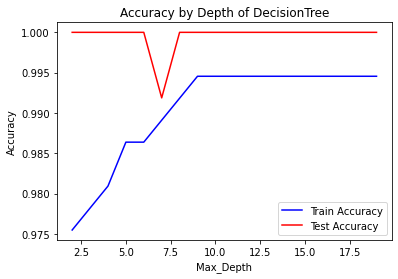

In [8]:
train_acc = []
test_acc = []

for i in range(2,20):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train, y_train)

    train_acc.append(tree1.score(X_train, y_train))
    test_acc.append(tree1.score(X_test, y_test))
    
plt.plot(range (2,20),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,20),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

In [17]:
species_prediction = tree1.predict([[0, 0, 0, 10]])

In [18]:
species_prediction

array([0.])